In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset. Replace 'titanic.csv' with your own dataset file for your project.
# Ensure the dataset file exists and is in the same directory as this jupyter notebook.
df = pd.read_csv('Student_Mental_Stress_and_Coping_Mechanisms.csv')

# Display the first few rows of the dataframe to ensure it is loaded correctly
display(df.head())

,Student ID,Age,Gender,Academic Performance (GPA),Study Hours Per Week,Social Media Usage (Hours per day),Sleep Duration (Hours per night),Physical Exercise (Hours per week),Family Support,Financial Stress,Peer Pressure,Relationship Stress,Mental Stress Level,Counseling Attendance,Diet Quality,Stress Coping Mechanisms,Cognitive Distortions,Family Mental Health History,Medical Condition,Substance Use
0,802-17-3671,22,Female,2,9,2,12,2,1,1,3,5,9,No,1,Walking or Nature Walks,4,No,Yes,1
1,871-12-8572,25,Female,0,28,0,6,0,1,1,1,2,9,Yes,3,Meditation,2,Yes,No,1
2,495-13-2672,24,Female,0,45,3,12,10,3,3,1,4,9,Yes,5,Reading,1,Yes,Yes,3
3,365-77-2496,20,Male,2,8,7,7,4,1,3,2,5,1,No,1,Social Media Engagement,2,Yes,No,4
4,664-76-5622,28,Male,0,14,6,8,1,2,4,4,2,7,Yes,1,Exercise,1,Yes,No,3


Q1: What percentages of students are male and female?

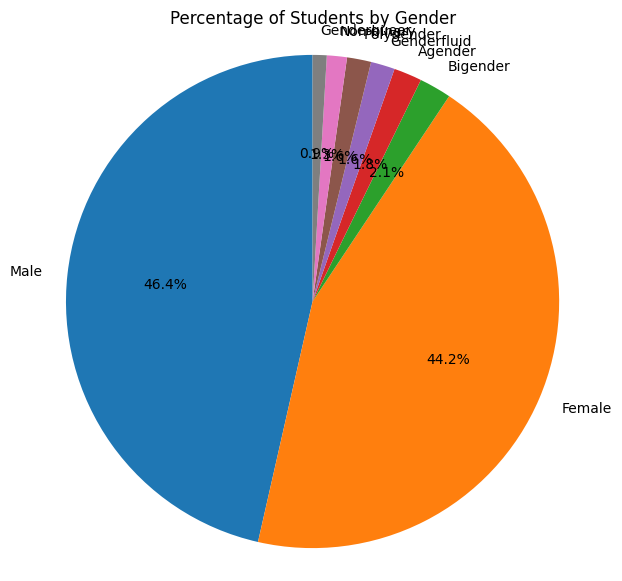

In [4]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Students by Gender')
plt.axis('equal') 
plt.show()

Q2: Which coping mechanisms are most commonly reported?


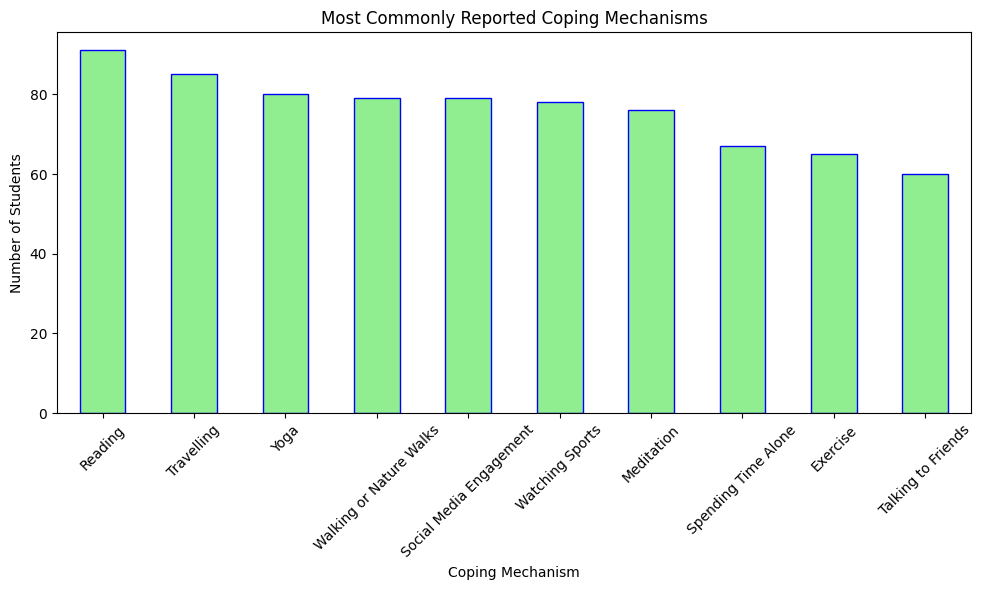

In [63]:
coping_series = df['Stress Coping Mechanisms'].dropna()

counts = coping_series.value_counts()


counts.plot(kind='bar', figsize=(10,6), edgecolor='blue', color='lightgreen')
plt.title('Most Commonly Reported Coping Mechanisms')
plt.xlabel('Coping Mechanism')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Q3: what are the average hour of sleep student get per day?

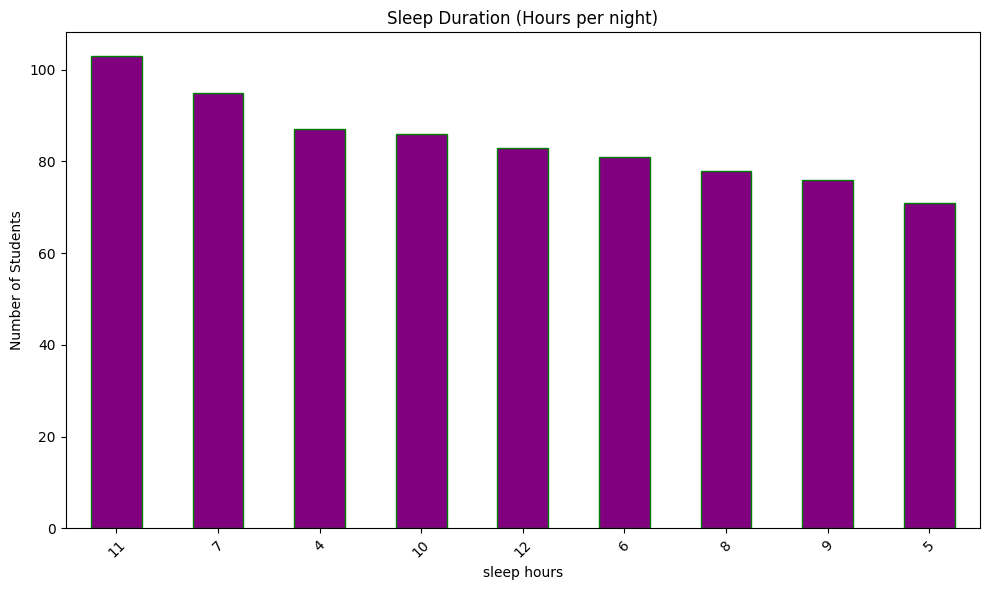

In [65]:
hours_of_sleep = df['Sleep Duration (Hours per night)']
counts = hours_of_sleep.value_counts()

counts.plot(kind='bar', figsize=(10,6),edgecolor='green', color='purple')
plt.title('Sleep Duration (Hours per night)')
plt.xlabel('sleep hours')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Q4:what are the financial stress leave(1-5)?

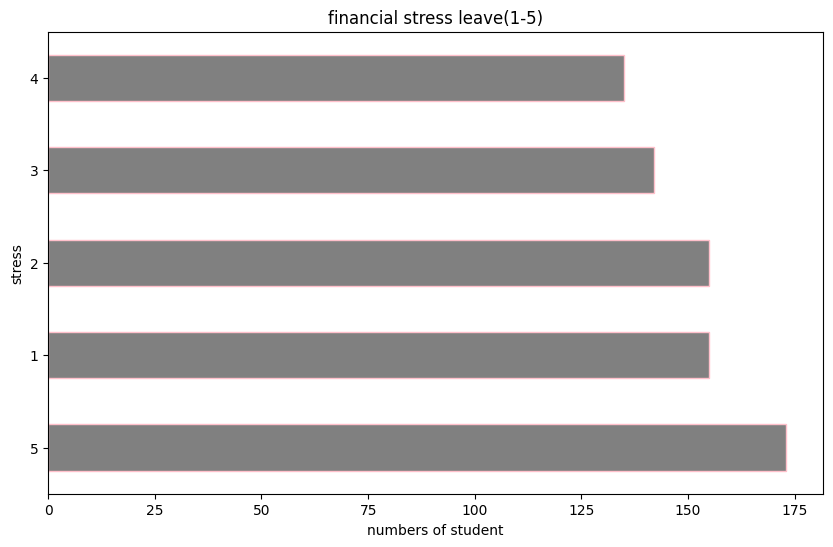

In [67]:
stress_level = df['Financial Stress'].value_counts()

stress_level.plot(kind='barh', figsize=(10,6),edgecolor='pink', color='gray')
plt.xlabel('numbers of student')
plt.ylabel('stress')
plt.title('financial stress leave(1-5)')
plt.show()




Q5:What is the level fo peer pressure student feel(1-5)?

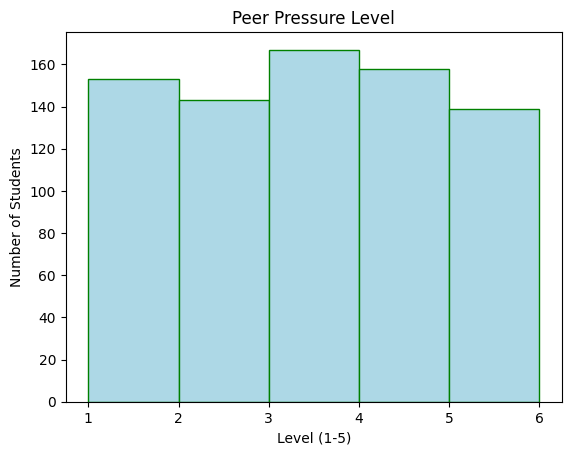

In [53]:
plt.hist(df['Peer Pressure'], bins=range(1,7), edgecolor='green', color='lightblue')
plt.xlabel('Level (1-5)')
plt.ylabel('Number of Students')
plt.title('Peer Pressure Level')
plt.show()

Q6: What is the distribution of family support scores (1–5 scale)?

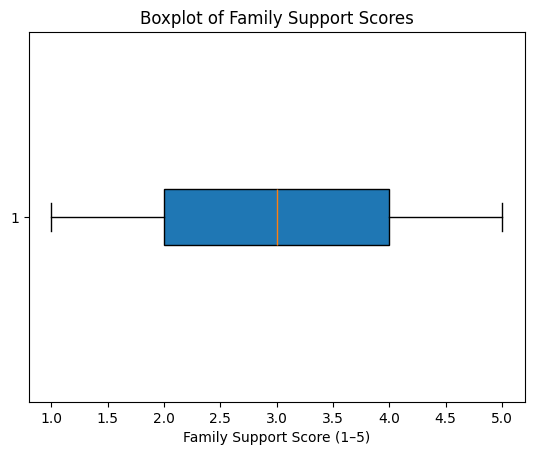

In [49]:
df.columns = df.columns.str.strip()


plt.boxplot(df['Family Support'].dropna(),vert=False,  patch_artist=True)
plt.xlabel('Family Support Score (1–5)')
plt.title('Boxplot of Family Support Scores')
plt.show()

Q7:What percentage of students have attended counseling sessions?

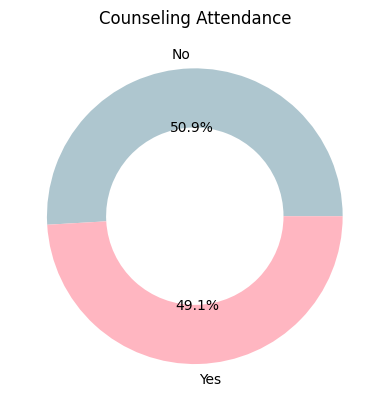

In [43]:
attendance_counts = df['Counseling Attendance'].value_counts()

plt.pie(attendance_counts, labels=attendance_counts.index, autopct='%1.1f%%',  wedgeprops={'width':0.4}, colors = ['#AEC6CF', '#FFB6C1'])
plt.title('Counseling Attendance')
plt.show()

Q8: Do students with higher GPAs tend to report lower or higher stress levels?

/var/folders/n_/cz2fpj9523z28rjn177_1g500000gn/T/ipykernel_1031/1321877451.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Academic Performance (GPA)', y='Mental Stress Level', data=df, palette='pastel')


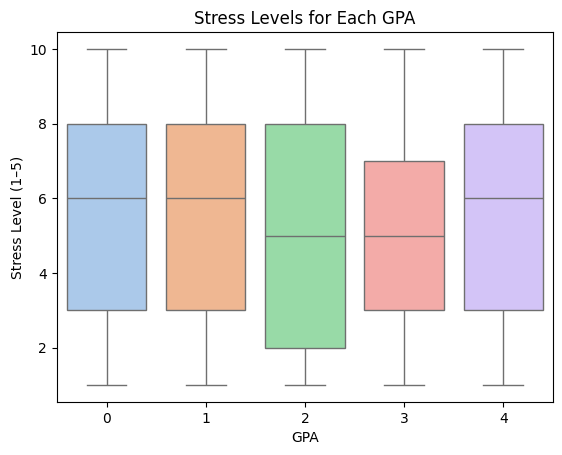

In [68]:

sns.boxplot(x='Academic Performance (GPA)', y='Mental Stress Level', data=df, palette='pastel')
plt.title('Stress Levels for Each GPA')
plt.xlabel('GPA')
plt.ylabel('Stress Level (1–5)')
plt.show()


Q9: Do students with higher family support scores report lower financial stress?

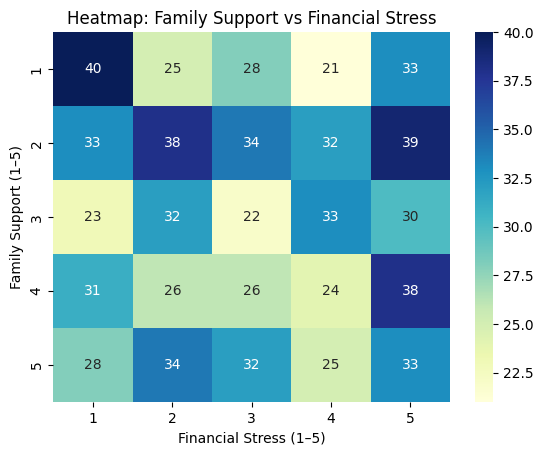

In [76]:
heatmap_data = pd.crosstab(df['Family Support'], df['Financial Stress'])

# Plot heatmap
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Financial Stress (1–5)')
plt.ylabel('Family Support (1–5)')
plt.title('Heatmap: Family Support vs Financial Stress')
plt.show()

Q10? what reported unhealthy happen have the most stress?

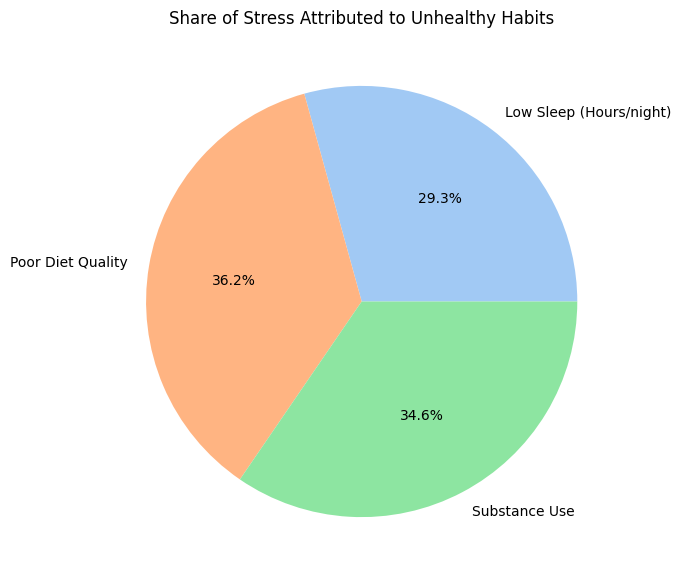

In [ ]:
avg_stress = {
    'Low Sleep (Hours/night)': df.groupby('Sleep Duration (Hours per night)')['Mental Stress Level'].mean().min(),
    'Poor Diet Quality': df.groupby('Diet Quality')['Mental Stress Level'].mean().max(),
    'Substance Use': df.groupby('Substance Use')['Mental Stress Level'].mean().max()
}


stress_df = pd.DataFrame(list(avg_stress.items()), columns=['Unhealthy Habit', 'Avg Stress Level'])

plt.figure(figsize=(7,7))
plt.pie(stress_df['Avg Stress Level'], labels=stress_df['Unhealthy Habit'], 
        autopct='%1.1f%%', colors=sns.color_palette("pastel"))

plt.title("Share of Stress Attributed to Unhealthy Habits")
plt.show()



In [14]:
display(df.columns)

Index(['Student ID', 'Age', 'Gender', 'Academic Performance (GPA)',
       'Study Hours Per Week', 'Social Media Usage (Hours per day)',
       'Sleep Duration (Hours per night)',
       'Physical Exercise (Hours per week)', 'Family Support  ',
       'Financial Stress', 'Peer Pressure', 'Relationship Stress',
       'Mental Stress Level', 'Counseling Attendance', 'Diet Quality',
       'Stress Coping Mechanisms', 'Cognitive Distortions',
       'Family Mental Health History', 'Medical Condition', 'Substance Use'],
      dtype='object')